In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

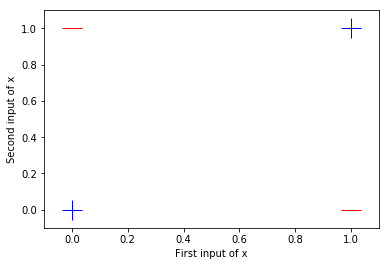

In [18]:
# Visualization of XOR in 2-D Space

plt.plot([1,0], [1,0], 'ro', marker="+", markersize=20,  color = 'blue')
plt.plot([1,0], [0,1], 'ro', marker="_", markersize=20,  color = 'red')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.xlabel('First input of x',size=10)
plt.ylabel('Second input of x',size=10)
plt.show()

In [19]:
# Sigmoid Function
def sigm(x):
    return 1/(1+ np.exp(-x))

# Derivative of Sigmoid Function
def der(x): # takes sigmoid of x
    return x*(1-x)

# Propogation
def prop(lr, epochs, noise):
    
    # Variables Initialization
    
    x = np.array([[1,1],[0,0],[1,0],[0,1]])    # Input matrix
    x = np.random.normal(loc=x, scale=noise)   # adding gaussian noise
    y = np.array([[1],[1],[-1],[-1]])          # Target Output
    w_hidden = np.random.rand(2,2)             # 2x2 random Hidden weights
    w_out = np.random.rand(2,1)                # 2x1 random output weights

    in_h = np.zeros((4,2))                     # Input at Hidden Layer
    out_h = np.zeros((4,2))                    # Output from Hidden Layer
    out_y = np.zeros((4,1))                    # Estimated Output

    for i in range(epochs):
    
    # Forward Propogation
        in_h = np.matmul(x,w_hidden)
        out_h = sigm(in_h)
        out_y = np.matmul(out_h, w_out)
    
    # Backward Propogation
        error = y - out_y
        del_2 = error * lr
        w_out = w_out + np.matmul(out_h.T, del_2)
    
        del_1 = np.matmul(del_2, w_out.T) * der(out_h)
        w_hidden = w_hidden + np.matmul(x.T, del_1)
        
    return(w_hidden, w_out)


# Predict function uses weights to predict outputs on new inputs
def predict(x, W_hidden, W_out):
    in_h = np.matmul(x,W_hidden)
    out_h = sigm(in_h)
    out_y = np.matmul(out_h,W_out)
    return out_y

In [20]:
lr = 0.01         # Learning Rate
epochs = 100000   # Epochs
noise = 0      # Gaussian Noise
W_hidden, W_out = prop(lr, epochs, noise)

In [21]:
print("Hidden Weights (w1, w2, w3, w4) : {}, {}, {}, {}".format(W_hidden[0][0], W_hidden[0][1], W_hidden[1][0], W_hidden[1][1]))
print("Output Weights (w5, w6)         : {}, {}".format(W_out[0][0], W_out[1][0]))

Hidden Weights (w1, w2, w3, w4) : 6.148254217, 1.26573292187, 6.14334802096, 1.26568078182
Output Weights (w5, w6)         : -11.7649313667, 13.7724855548


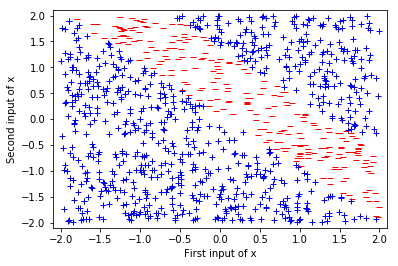

(760, 240)


In [22]:
# Classification Region in 2-D (Without Gaussian Noise)

random_inputs = np.random.uniform(low=-2, high=2, size=(1000,2))
k = predict(random_inputs, W_hidden, W_out)
plus = 0
minus = 0
for i in range (1000):
    if k[i][0] >= 0:
        plus = plus + 1
        plt.plot(random_inputs[i,0], random_inputs[i,1], 'ro', marker="+", color = 'blue')
    else:
        minus = minus +1
        plt.plot(random_inputs[i,0], random_inputs[i,1], 'ro', marker="_", color = 'red')
plt.axis([-2.1, 2.1, -2.1, 2.1])
plt.xlabel('First input of x',size=10)
plt.ylabel('Second input of x',size=10)
plt.show()
print(plus, minus)